In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
def wordCount(text):
    cwd = os.getcwd()
    file = open(cwd + '/' + text, 'r')
    
    counter = {}
    for word in file.read().split():
        if word not in counter:
            counter[word] = 1
        else: 
            counter[word] += 1
        
    dfCount = Series(counter).to_frame()
    dfCount.columns = ['Count']
    dfCount.name = 'Word-Count'
    
    return dfCount.sort_values('Count', ascending=False)

In [8]:
def splitTarget(data, target):
    targetdf = data[target]
    featuredf = data.drop(target, axis=1)
    return targetdf, featuredf

In [15]:
def missingSummary(data):
    total = data.isnull().sum()
    percent = data.isnull().sum() / data.isnull().count() * 100 
    missingDf = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missingDf = round(missingDf.sort_values('Percent', ascending=False),0)
    
    plt.figure(figsize=(8,8))
    ax = sns.barplot(x="Percent", y=missingDf.index, data=missingDf)
    
    plt.title('Missing Data Summary')
    plt.xlabel('Percent Missing (%)')
    plt.ylabel('Attributes')
    plt.show()
    
    return missingDf

In [5]:
df = pd.read_excel('SampleData-2.xls')
df.head()

,Overall Experience,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Quality of business center,Timeliness of airport shuttle,Overall fitness center,Room service speed
0,9,10.0,8.0,10.0,10.0,9.0,NaN,10.0,10.0,10.0,NaN,NaN,10.0,NaN
1,10,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0
2,8,NaN,NaN,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,NaN,NaN,8.0,9.0,9.0,NaN,10.0,3.0,7.0,NaN,NaN,NaN,NaN
4,5,NaN,NaN,10.0,10.0,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN


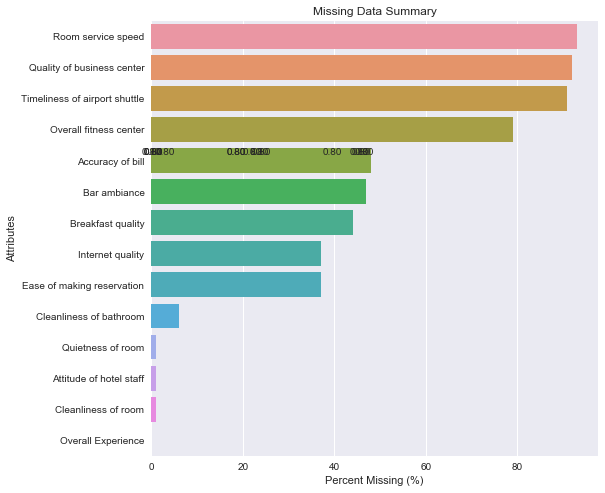

,Total,Percent
Room service speed,9338,93.0
Quality of business center,9232,92.0
Timeliness of airport shuttle,9071,91.0
Overall fitness center,7871,79.0
Accuracy of bill,4808,48.0
Bar ambiance,4684,47.0
Breakfast quality,4357,44.0
Internet quality,3744,37.0
Ease of making reservation,3744,37.0
Cleanliness of bathroom,592,6.0


In [14]:
missingSummary(df)

In [9]:
target, features = splitTarget(df, 'Overall Experience')

In [10]:
assert len(target) == len(features), "All Clear"